<a href="https://colab.research.google.com/github/N00B-MA5TER/ML-Projects/blob/main/Introvert_vs_Extrovert_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rakeshkapilavai/extrovert-vs-introvert-behavior-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'extrovert-vs-introvert-behavior-data' dataset.
Path to dataset files: /kaggle/input/extrovert-vs-introvert-behavior-data


In [24]:
import numpy as np
import pandas as pd

df = pd.read_csv(path + "/personality_dataset.csv")
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


**Exploratory Data Analysis**

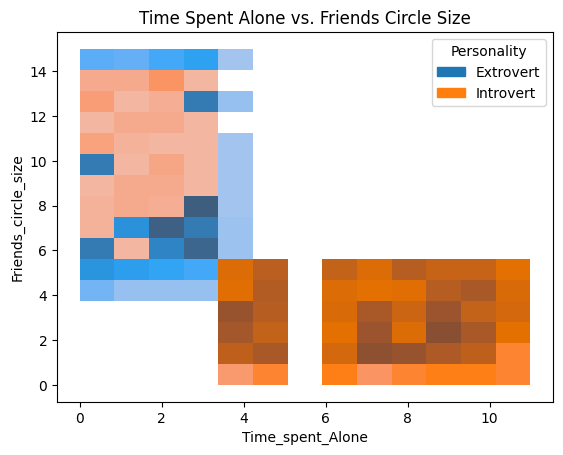

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=df, x='Time_spent_Alone', y='Friends_circle_size', hue='Personality')
plt.title('Time Spent Alone vs. Friends Circle Size')
plt.show()

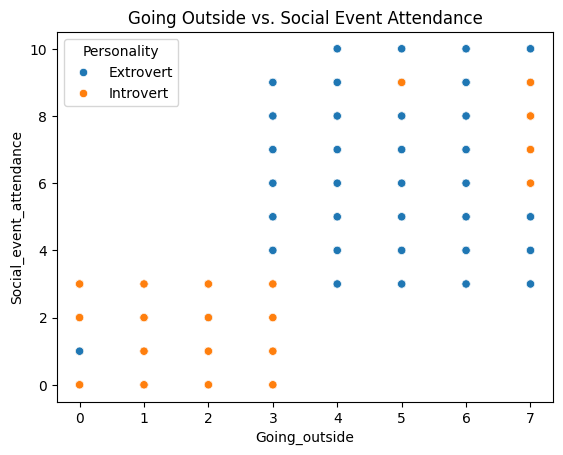

In [26]:
sns.scatterplot(data=df, x='Going_outside', y='Social_event_attendance', hue='Personality')
plt.title('Going Outside vs. Social Event Attendance')
plt.show()

Text(0.5, 1.0, 'Stage Fear by Personality')

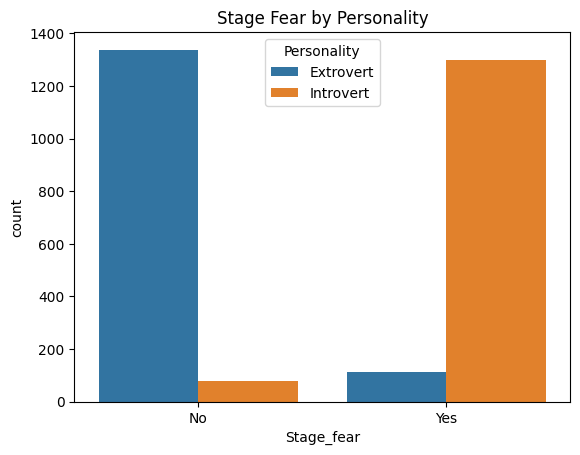

In [27]:
sns.countplot(data=df, x='Stage_fear', hue='Personality')
plt.title('Stage Fear by Personality')

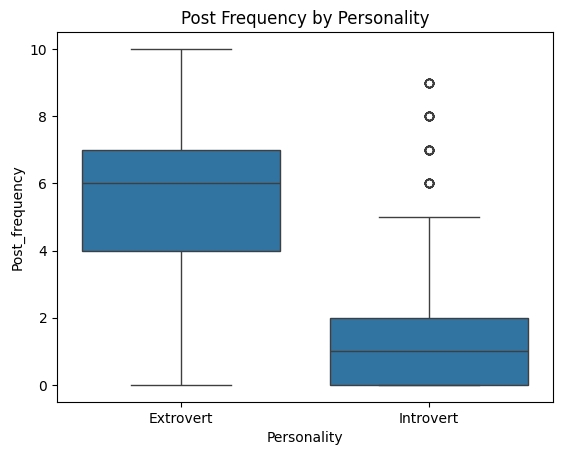

In [28]:
sns.boxplot(data=df, x='Personality', y='Post_frequency')
plt.title('Post Frequency by Personality')
plt.show()

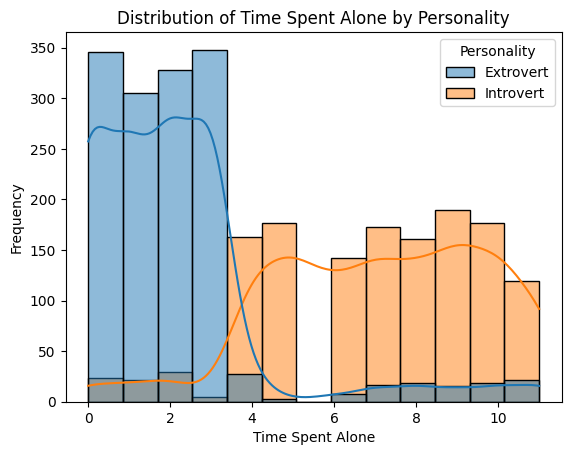

In [29]:
sns.histplot(data=df, x='Time_spent_Alone', hue='Personality', kde=True)
plt.title('Distribution of Time Spent Alone by Personality')
plt.xlabel('Time Spent Alone')
plt.ylabel('Frequency')
plt.show()

**Data Preprocessing**

In [30]:
df.shape

(2900, 8)

Checking for and handling missing values

In [31]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64


In [32]:
median_going_outside = df['Going_outside'].median()
df['Going_outside'].fillna(median_going_outside, inplace=True)
df.dropna(inplace=True)
df.isnull().sum()

/tmp/ipython-input-2005562251.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Going_outside'].fillna(median_going_outside, inplace=True)


,0
Time_spent_Alone,0
Stage_fear,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,0
Personality,0


Encoding categorical columns

In [35]:
df['Stage_fear'] = df['Stage_fear'].replace({'No': 0, 'Yes': 1})
df['Drained_after_socializing'] = df['Drained_after_socializing'].replace({'No': 0, 'Yes': 1})
df['Personality'] = df['Personality'].replace({'Introvert': 0, 'Extrovert': 1})
df.head()

/tmp/ipython-input-1378416385.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Personality'] = df['Personality'].replace({'Introvert': 0, 'Extrovert': 1})


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,1
1,9.0,1,0.0,0.0,1,0.0,3.0,0
2,9.0,1,1.0,2.0,1,5.0,2.0,0
3,0.0,0,6.0,7.0,0,14.0,8.0,1
4,3.0,0,9.0,4.0,0,8.0,5.0,1


In [34]:
df.shape

(2531, 8)

**Introvert --> 0**

**Extrovert --> 1**

In [36]:
df['Personality'].value_counts()

,count
Personality,
1,1303
0,1228


In [39]:
df.describe()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
count,2531.000000,2531.000000,2531.000000,2531.000000,2531.000000,2531.000000,2531.000000,2531.000000
mean,4.523113,0.498617,3.940735,3.013433,0.498617,6.248123,3.558277,0.514816
std,3.492137,0.500097,2.900123,2.233021,0.500097,4.311680,2.926650,0.499879
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2.000000,1.000000,0.000000,3.000000,1.000000,0.000000
50%,4.000000,0.000000,3.000000,3.000000,0.000000,5.000000,3.000000,1.000000
75%,8.000000,1.000000,6.000000,5.000000,1.000000,10.000000,6.000000,1.000000
max,11.000000,1.000000,10.000000,7.000000,1.000000,15.000000,10.000000,1.000000


**Splitting Features and Target**

In [40]:
X = df.drop('Personality', axis=1)
y = df['Personality']
display(X.head())
display(y.head())

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,4.0,0,4.0,6.0,0,13.0,5.0
1,9.0,1,0.0,0.0,1,0.0,3.0
2,9.0,1,1.0,2.0,1,5.0,2.0
3,0.0,0,6.0,7.0,0,14.0,8.0
4,3.0,0,9.0,4.0,0,8.0,5.0


,Personality
0,1
1,0
2,0
3,1
4,1


**Train Test Split**

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2024, 7)
Shape of X_test: (507, 7)
Shape of y_train: (2024,)
Shape of y_test: (507,)


**Model Training**

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Instantiate models
log_reg = LogisticRegression(random_state=42)
dec_tree = DecisionTreeClassifier(random_state=42)
svc = SVC(random_state=42)
knn = KNeighborsClassifier()

# Train models
log_reg.fit(X_train, y_train)
dec_tree.fit(X_train, y_train)
svc.fit(X_train, y_train)
knn.fit(X_train, y_train)

print("Models trained.")

Models trained.


**Model Evaluation**

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dec_tree,
    "SVC": svc,
    "KNN": knn
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\n")

--- Logistic Regression ---
Accuracy: 0.9586
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       265
           1       0.95      0.96      0.96       242

    accuracy                           0.96       507
   macro avg       0.96      0.96      0.96       507
weighted avg       0.96      0.96      0.96       507

Confusion Matrix:
[[254  11]
 [ 10 232]]


--- Decision Tree ---
Accuracy: 0.8955
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       265
           1       0.89      0.89      0.89       242

    accuracy                           0.90       507
   macro avg       0.90      0.90      0.90       507
weighted avg       0.90      0.90      0.90       507

Confusion Matrix:
[[238  27]
 [ 26 216]]


--- SVC ---
Accuracy: 0.9586
Classification Report:
              precision    recall  f1-score   support

           0       0.96

Checking how XGBoost performs here

In [44]:
!pip install xgboost

In [45]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate XGBoostClassifier
xgb = XGBClassifier(random_state=42)

# Train the model
xgb.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print("--- XGBoost Classifier ---")
print(f"Accuracy: {accuracy_xgb:.4f}")
print("Classification Report:")
print(report_xgb)
print("Confusion Matrix:")
print(conf_matrix_xgb)

--- XGBoost Classifier ---
Accuracy: 0.9369
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       265
           1       0.93      0.93      0.93       242

    accuracy                           0.94       507
   macro avg       0.94      0.94      0.94       507
weighted avg       0.94      0.94      0.94       507

Confusion Matrix:
[[249  16]
 [ 16 226]]
